In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

zip

## API call
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
from pprint import pprint
#testing if the api works correctly with 1 single city
base_url = 'http://api.openweathermap.org/data/2.5/weather'
target_city = "vaitupu"
params = {"q" : target_city, "appid" : weather_api_key, "units": "imperial"}

test_city = requests.get(base_url, params=params).json()
pprint(test_city)

{'cod': '404', 'message': 'city not found'}


### putting the data into a data frame
* instead of doing weather check for ach of the city, gather the dat into a list/dict...
* I want to try to retrive the data and put them into a data frame at the same process.
* using for loop with .iterrows()

In [11]:
weather_df = pd.DataFrame()
weather_df['Cities'] = cities
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['Max Temp'] = ""
weather_df['Humidity'] = ""
weather_df['Cloudiness'] = ""
weather_df['Wind Speed'] = ""
weather_df['Date'] = ""

In [12]:
counter = 0
weather_json = []

base_url = 'http://api.openweathermap.org/data/2.5/weather'


for index,row in weather_df.iterrows():
    city = row['Cities']
    params = {"q" : city, "appid" : weather_api_key, "units" : "imperial"}
    weather_response = requests.get(base_url, params=params).json()
    counter += 1
    print(f"Processing Record {counter} | {city}")
    
    time.sleep(1)
    try:
        weather_df.loc[index, "Lat"] = weather_response['coord']['lat']
        weather_df.loc[index, "Lng"] = weather_response['coord']['lon']
        weather_df.loc[index, "Max Temp"] = weather_response['main']['temp_max']
        weather_df.loc[index, "Humidity"] = weather_response['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = weather_response['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = weather_response['wind']['speed']
        weather_df.loc[index, "Date"] = weather_response['dt']
    except:
        print(f"ERROR! THERE IS NO INFO ABOUT {city}")

Processing Record 1 | rikitea
Processing Record 2 | half moon bay
Processing Record 3 | aklavik
Processing Record 4 | kodiak
Processing Record 5 | ponta do sol
Processing Record 6 | mataura
Processing Record 7 | provideniya
Processing Record 8 | bluff
Processing Record 9 | cururupu
Processing Record 10 | vaini
Processing Record 11 | sur
Processing Record 12 | san patricio
Processing Record 13 | port alfred
Processing Record 14 | atuona
Processing Record 15 | georgetown
Processing Record 16 | clyde river
Processing Record 17 | zhuanghe
Processing Record 18 | ardakan
Processing Record 19 | bengkulu
Processing Record 20 | ushuaia
Processing Record 21 | nizhneyansk
ERROR! THERE IS NO INFO ABOUT nizhneyansk
Processing Record 22 | punta arenas
Processing Record 23 | ardistan
ERROR! THERE IS NO INFO ABOUT ardistan
Processing Record 24 | guerrero negro
Processing Record 25 | kapaa
Processing Record 26 | qandala
Processing Record 27 | north bend
Processing Record 28 | port elizabeth
Processing 

Processing Record 229 | geraldton
Processing Record 230 | caravelas
Processing Record 231 | general pico
Processing Record 232 | buraydah
Processing Record 233 | lebyazhye
Processing Record 234 | cherskiy
Processing Record 235 | ladario
Processing Record 236 | qaanaaq
Processing Record 237 | floresti
Processing Record 238 | puerto escondido
Processing Record 239 | assiniboia
Processing Record 240 | asfi
Processing Record 241 | yerbogachen
Processing Record 242 | nokha
Processing Record 243 | ruteng
Processing Record 244 | poum
Processing Record 245 | todos santos
Processing Record 246 | maloy
Processing Record 247 | san cristobal
Processing Record 248 | karonga
Processing Record 249 | saldanha
Processing Record 250 | giresun
Processing Record 251 | victoria
Processing Record 252 | lagoa
Processing Record 253 | surgut
Processing Record 254 | kindu
Processing Record 255 | nanortalik
Processing Record 256 | sao filipe
Processing Record 257 | sept-iles
Processing Record 258 | linjiang
Proc

Processing Record 457 | nuevo laredo
Processing Record 458 | namibe
Processing Record 459 | kanniyakumari
Processing Record 460 | kimbe
Processing Record 461 | zabol
Processing Record 462 | humaita
Processing Record 463 | seybaplaya
Processing Record 464 | katherine
Processing Record 465 | leningradskiy
Processing Record 466 | vaasa
Processing Record 467 | sioux lookout
Processing Record 468 | san quintin
Processing Record 469 | la playona
Processing Record 470 | puerto lempira
Processing Record 471 | saint-gaudens
Processing Record 472 | palabuhanratu
ERROR! THERE IS NO INFO ABOUT palabuhanratu
Processing Record 473 | khudumelapye
Processing Record 474 | henties bay
Processing Record 475 | mahuta
Processing Record 476 | watrous
Processing Record 477 | forssa
Processing Record 478 | amursk
Processing Record 479 | takab
Processing Record 480 | sinfra
Processing Record 481 | mnogovershinnyy
Processing Record 482 | karratha
Processing Record 483 | waipawa
Processing Record 484 | hoquiam
P

### clear out all the row that couldn't get data due to errors

In [14]:
#replace all the '' value (it's string type) by NaN
weather_df = weather_df.replace('', np.NaN)
#start dropping NaN value
weather_df = weather_df.dropna(axis=0, how="any")
weather_df.head(10)

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,rikitea,-23.1203,-134.9692,75.16,79.0,90.0,18.61,1.635035e+09
1,half moon bay,37.4636,-122.4286,68.18,71.0,90.0,4.00,1.635035e+09
2,aklavik,68.2191,-135.0107,30.92,94.0,46.0,3.11,1.635035e+09
3,kodiak,57.7900,-152.4072,45.91,76.0,90.0,10.36,1.635035e+09
4,ponta do sol,32.6667,-17.1000,69.01,65.0,21.0,6.89,1.635035e+09
5,mataura,-46.1927,168.8643,58.46,80.0,100.0,1.30,1.635035e+09
6,provideniya,64.3833,-173.3000,25.81,77.0,100.0,8.21,1.635035e+09
7,bluff,-46.6000,168.3333,52.30,92.0,100.0,1.81,1.635035e+09
8,cururupu,-1.8283,-44.8683,76.33,89.0,100.0,3.18,1.635035e+09
9,vaini,-21.2000,-175.2000,78.96,73.0,20.0,11.50,1.635035e+09


In [15]:
#It's pointless to get these stat calculation for Date, Lattitude and Longitude.
weather_df[['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].describe()

,Max Temp,Humidity,Cloudiness,Wind Speed
count,572.000000,572.000000,572.000000,572.000000
mean,60.359143,74.900350,58.597902,7.424668
std,19.737408,18.077829,39.174662,5.355445
min,-6.970000,12.000000,0.000000,0.000000
25%,47.292500,66.000000,17.000000,3.195000
50%,63.825000,79.000000,75.000000,5.930000
75%,76.330000,88.000000,97.000000,10.560000
max,98.420000,100.000000,100.000000,25.720000


In [16]:
#Check if there are places that have the humidity >100%
weather_df.loc[weather_df['Humidity'] > 100]
#There is no places in the DF had the humidity >100%

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


### There is no places in the data frame that have the humidity > 100%

#### Save the weather_df to csv file for part 2

In [56]:
weather_df.to_csv(output_data_file)

# Plotting data

### Latitude vs Max Temp

<AxesSubplot:title={'center':'City Latitide vs Max Temperature'}, xlabel='Lat', ylabel='Max Temp'>

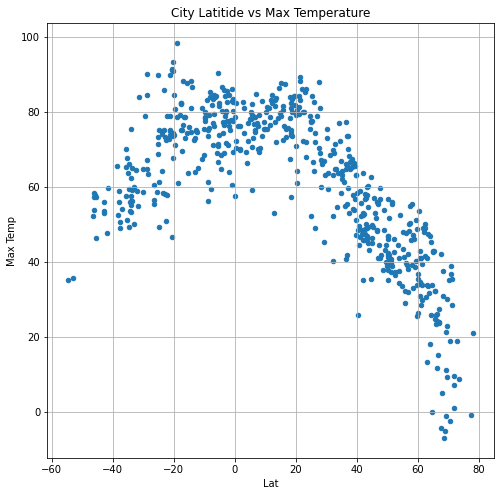

In [21]:
weather_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, 
                title="City Latitide vs Max Temperature", figsize=(8,8))

### Latitude vs Humidity

<AxesSubplot:title={'center':'City Latitide vs Humidity'}, xlabel='Lat', ylabel='Humidity'>

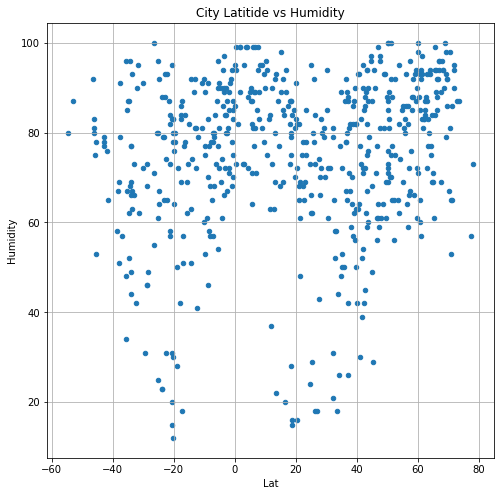

In [22]:
weather_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, 
                title="City Latitide vs Humidity", figsize=(8,8))

### Latitude vs Cloudiness

<AxesSubplot:title={'center':'City Latitide vs Cloudiness'}, xlabel='Lat', ylabel='Cloudiness'>

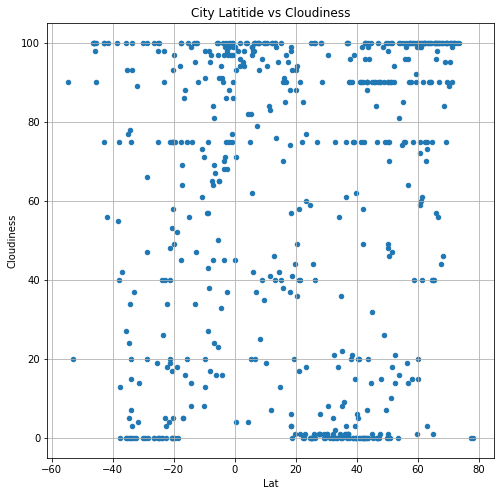

In [23]:
weather_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, 
                title="City Latitide vs Cloudiness", figsize=(8,8))

### Latitude vs Wind Speed

<AxesSubplot:title={'center':'City Latitide vs Wind Speed'}, xlabel='Lat', ylabel='Wind Speed'>

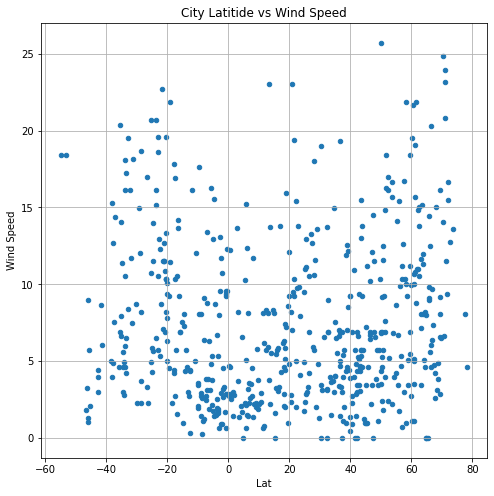

In [24]:
weather_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, 
                title="City Latitide vs Wind Speed", figsize=(8,8))

#  Linear Regression

In [25]:
northern_hem_df = weather_df.loc[weather_df["Lat"] > 0]
southern_hem_df = weather_df.loc[weather_df["Lat"] < 0]
southern_hem_df

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,rikitea,-23.1203,-134.9692,75.16,79.0,90.0,18.61,1.635035e+09
5,mataura,-46.1927,168.8643,58.46,80.0,100.0,1.30,1.635035e+09
7,bluff,-46.6000,168.3333,52.30,92.0,100.0,1.81,1.635035e+09
8,cururupu,-1.8283,-44.8683,76.33,89.0,100.0,3.18,1.635035e+09
9,vaini,-21.2000,-175.2000,78.96,73.0,20.0,11.50,1.635035e+09
...,...,...,...,...,...,...,...,...
598,omboue,-1.5746,9.2618,75.22,91.0,100.0,3.33,1.635036e+09
606,tutoia,-2.7619,-42.2744,80.22,84.0,100.0,9.57,1.635036e+09
610,quilmana,-12.9500,-76.3833,63.84,81.0,34.0,2.73,1.635036e+09
611,vaitape,-16.5167,-151.7500,78.62,77.0,86.0,13.67,1.635036e+09


### 1--Northern Hemisphere Latitude and Max Temperature (Fahrenheit)

the r value: -0.866997


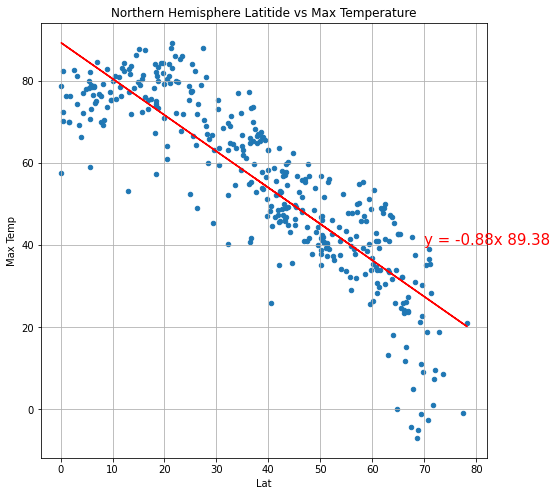

In [47]:
(slope, intercept, r_value, p_value, stderr)= linregress(northern_hem_df.Lat, northern_hem_df['Max Temp'])

#set the regression equation to graph the line y = ax + b
regression_value = northern_hem_df.Lat * slope + intercept
#print out equ on the graph
line_equ = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
northern_hem_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, 
                title="Northern Hemisphere Latitide vs Max Temperature", figsize=(8,8))
plt.plot(northern_hem_df.Lat, regression_value, "r")
plt.annotate(line_equ, (70,40),color="r", fontsize=15)
print(f"the r value: {round(r_value, 6)}")

### 2--Southern Hem and Max Temp (Fahrenheit)

the r value: 0.644872


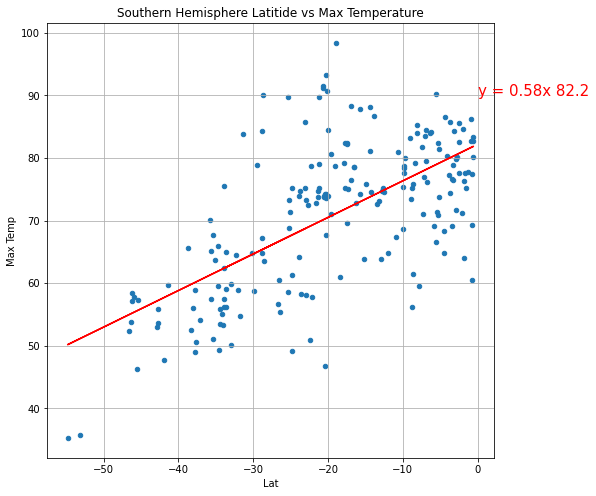

In [48]:
(slope2, intercept2, r_value2, p_value2, stderr2)= linregress(southern_hem_df.Lat, southern_hem_df['Max Temp'])

#set the regression equation to graph the line y = ax + b
regression_value2 = southern_hem_df.Lat * slope2 + intercept2
#print out equ on the graph
line_equ2 = "y = " + str(round(slope2, 2)) + "x " + str(round(intercept2,2))
southern_hem_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, 
                title="Southern Hemisphere Latitide vs Max Temperature", figsize=(8,8))
plt.plot(southern_hem_df.Lat, regression_value2, "r")
plt.annotate(line_equ2, (0,90),color="r", fontsize=15)
print(f"the r value: {round(r_value2, 6)}")

### 3--Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r value: 0.094962


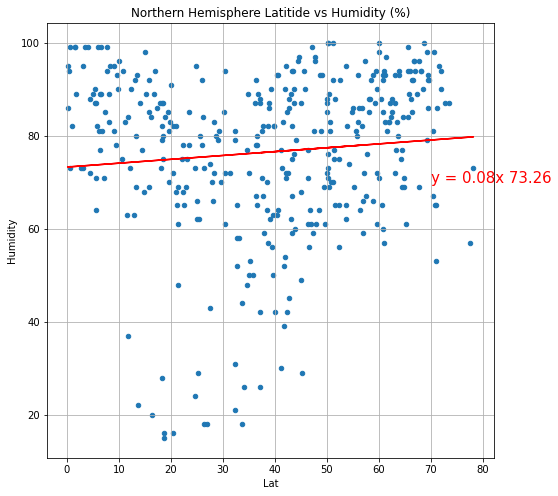

In [49]:
(slope3, intercept3, r_value3, p_value3, stderr3)= linregress(northern_hem_df.Lat, northern_hem_df.Humidity)

#set the regression equation to graph the line y = ax + b
regression_value3 = northern_hem_df.Lat * slope3 + intercept3
#print out equ on the graph
line_equ3 = "y = " + str(round(slope3, 2)) + "x " + str(round(intercept3,2))
northern_hem_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, 
                title="Northern Hemisphere Latitide vs Humidity (%)", figsize=(8,8))
plt.plot(northern_hem_df.Lat, regression_value3, "r")
plt.annotate(line_equ3, (70,70),color="r", fontsize=15)
print(f"the r value: {round(r_value3, 6)}")

### 4--Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r value: 0.152108


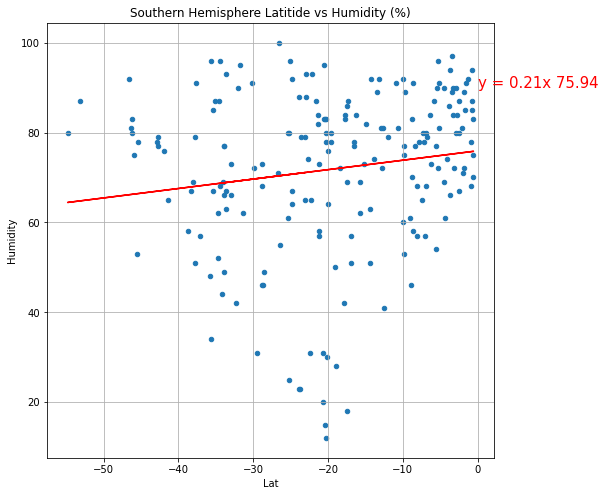

In [50]:
(slope4, intercept4, r_value4, p_value4, stderr4)= linregress(southern_hem_df.Lat, southern_hem_df['Humidity'])

#set the regression equation to graph the line y = ax + b
regression_value4 = southern_hem_df.Lat * slope4 + intercept4
#print out equ on the graph
line_equ4 = "y = " + str(round(slope4, 2)) + "x " + str(round(intercept4,2))
southern_hem_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, 
                title="Southern Hemisphere Latitide vs Humidity (%)", figsize=(8,8))
plt.plot(southern_hem_df.Lat, regression_value4, "r")
plt.annotate(line_equ4, (0,90),color="r", fontsize=15)
print(f"the r value: {round(r_value4, 6)}")

### 5-- Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r value: 0.119584


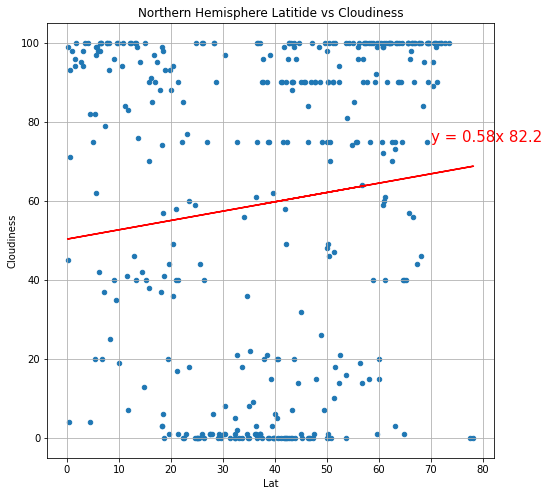

In [51]:
(slope5, intercept5, r_value5, p_value5, stderr5)= linregress(northern_hem_df.Lat, northern_hem_df['Cloudiness'])

#set the regression equation to graph the line y = ax + b
regression_value5 = northern_hem_df.Lat * slope5 + intercept5
#print out equ on the graph
line_equ5 = "y = " + str(round(slope5, 2)) + "x " + str(round(intercept5,2))
northern_hem_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, 
                title="Northern Hemisphere Latitide vs Cloudiness", figsize=(8,8))
plt.plot(northern_hem_df.Lat, regression_value5, "r")
plt.annotate(line_equ2, (70,75),color="r", fontsize=15)
print(f"the r value: {round(r_value5, 6)}")

### 6--Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r value: 0.208594


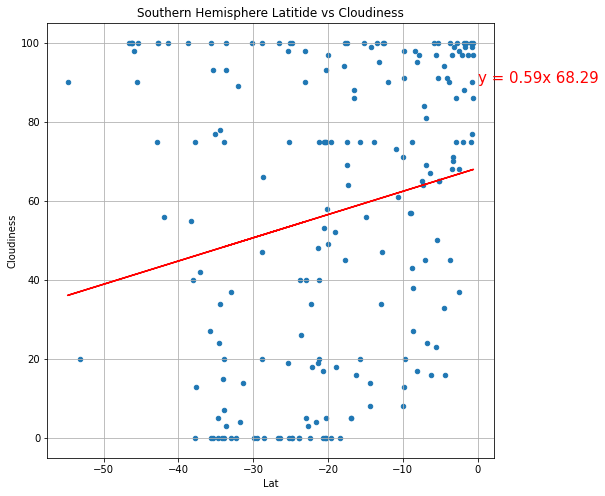

In [52]:
(slope6, intercept6, r_value6, p_value6, stderr6)= linregress(southern_hem_df.Lat, southern_hem_df['Cloudiness'])

#set the regression equation to graph the line y = ax + b
regression_value6 = southern_hem_df.Lat * slope6 + intercept6
#print out equ on the graph
line_equ6 = "y = " + str(round(slope6, 2)) + "x " + str(round(intercept6,2))
southern_hem_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, 
                title="Southern Hemisphere Latitide vs Cloudiness", figsize=(8,8))
plt.plot(southern_hem_df.Lat, regression_value6, "r")
plt.annotate(line_equ6, (0,90),color="r", fontsize=15)
print(f"the r value: {round(r_value6, 6)}")

### 7--Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r value: 0.283572


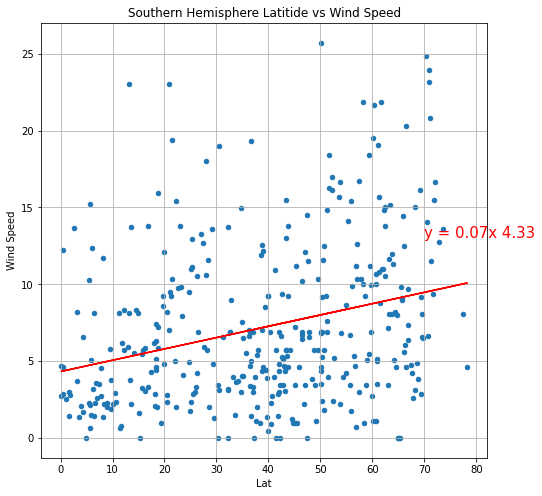

In [53]:
(slope7, intercept7, r_value7, p_value7, stderr7)= linregress(northern_hem_df.Lat, northern_hem_df['Wind Speed'])

#set the regression equation to graph the line y = ax + b
regression_value7 = northern_hem_df.Lat * slope7 + intercept7
#print out equ on the graph
line_equ7 = "y = " + str(round(slope7, 2)) + "x " + str(round(intercept7,2))
northern_hem_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, 
                title="Southern Hemisphere Latitide vs Wind Speed", figsize=(8,8))
plt.plot(northern_hem_df.Lat, regression_value7, "r")
plt.annotate(line_equ7, (70,13),color="r", fontsize=15)
print(f"the r value: {round(r_value7, 6)}")

### 8-- Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r value: -0.244467


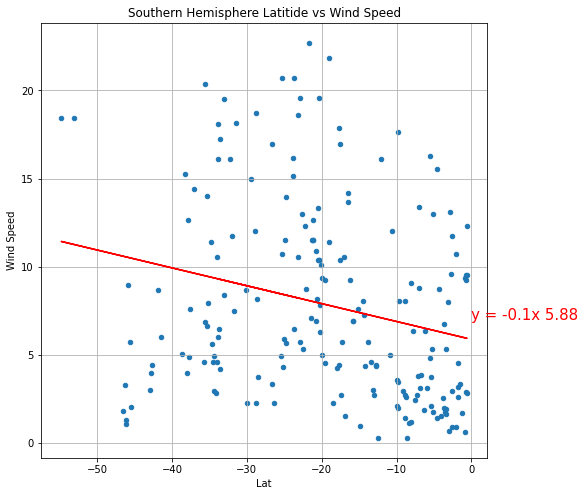

In [54]:
(slope8, intercept8, r_value8, p_value8, stderr8)= linregress(southern_hem_df.Lat, southern_hem_df['Wind Speed'])

#set the regression equation to graph the line y = ax + b
regression_value8 = southern_hem_df.Lat * slope8 + intercept8
#print out equ on the graph
line_equ8 = "y = " + str(round(slope8, 2)) + "x " + str(round(intercept8,2))
southern_hem_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, 
                title="Southern Hemisphere Latitide vs Wind Speed", figsize=(8,8))
plt.plot(southern_hem_df.Lat, regression_value8, "r")
plt.annotate(line_equ8, (0,7),color="r", fontsize=15)
print(f"the r value: {round(r_value8, 6)}")

## making function to graph (BONUS)

In [45]:
def scater_regress(frame, x_column, y_column):
    
    (slope, intercept, r_value, p_value, stderr)= linregress(x_column, y_column)

    #set the regression equation to graph the line y = ax + b
    regression_value = x_column * slope + intercept
    #print out equ on the graph
    line_equ = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
    plt.figure(figsize=(8,8))
    plt.scatter(x_column, y_column)
    plt.plot(x_column, regression_value, "r")
    plt.annotate(line_equ, (70,40),color="r", fontsize=15)
    print(f"the r value: {round(r_value, 6)}")

the r value: -0.866997


Text(0.5, 1.0, 'Northern Hemisphere Max Temperature')

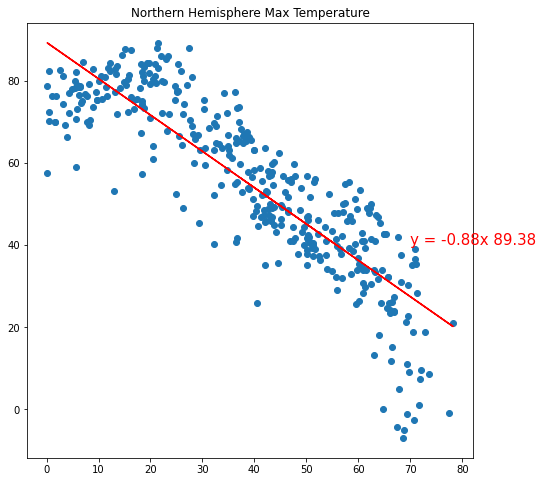

In [46]:
#Successfully functionalize the graphing codes.
#But, I have limitations. With function I have to use plt.scatter
#While manually code out every single block give me ability to customize the graph within the df.plot()

scater_regress(northern_hem_df, northern_hem_df.Lat, northern_hem_df['Max Temp'])
plt.title("Northern Hemisphere Max Temperature")

the r value: 0.152108


Text(0.5, 1.0, 'Soutern Hemisphere Humidity(%)')

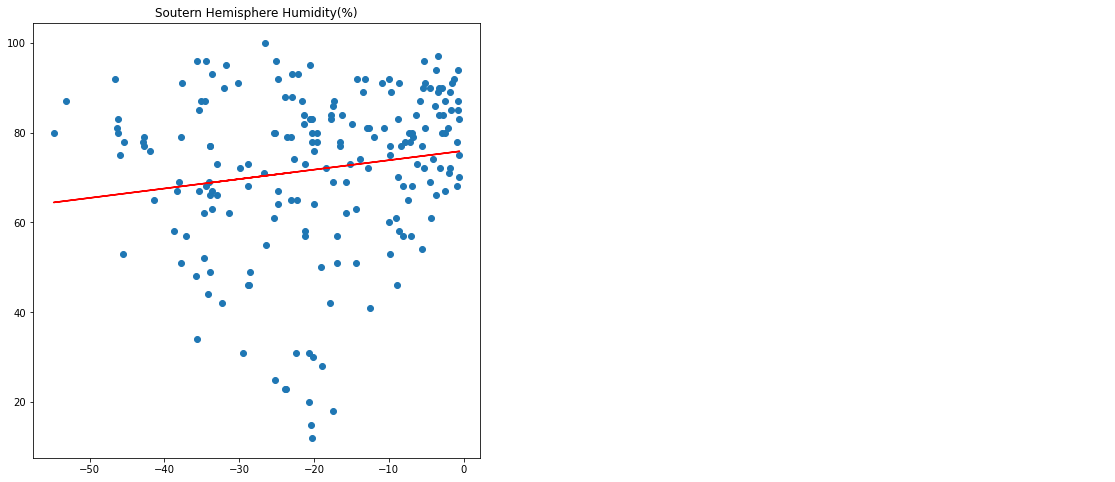

In [55]:
scater_regress(southern_hem_df, southern_hem_df.Lat, southern_hem_df.Humidity)
plt.title('Soutern Hemisphere Humidity(%)')